# Global IRF Efficiency Map

Generate global map of CDR efficiency using IRF forcing.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import matplotlib.pyplot as plt

import atlas

## Define experiment and phase



In [3]:
cdr_forcing = "DOR"
vintage = "001"
phase = "deploy"
clobber = False

In [4]:
calc = atlas.global_irf_map(cdr_forcing, vintage)

## Table of experiments

In [5]:
calc.df

,blueprint,polygon,polygon_master,basin,start_date,cdr_forcing,cdr_forcing_file,simulation_key,refdate,stop_n,wallclock,curtail_output
case,,,,,,,,,,,,
smyle.cdr-atlas-v0.control.001,smyle,NaN,NaN,None,1999-01,None,None,baseline,0347-01-01,16,12:00:00,False
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-01-01_00000.001,smyle,0.0,0.0,North_Atlantic_basin,1999-01,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_North_Atlantic_basin_000_1999-01-01_00000,0347-01-01,15,10:00:00,True
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-04-01_00001.001,smyle,0.0,0.0,North_Atlantic_basin,1999-04,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_North_Atlantic_basin_000_1999-04-01_00001,0347-04-01,15,10:00:00,True
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-07-01_00002.001,smyle,0.0,0.0,North_Atlantic_basin,1999-07,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_North_Atlantic_basin_000_1999-07-01_00002,0347-07-01,15,10:00:00,True
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-10-01_00003.001,smyle,0.0,0.0,North_Atlantic_basin,1999-10,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_North_Atlantic_basin_000_1999-10-01_00003,0347-10-01,15,10:00:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...
smyle.cdr-atlas-v0.glb-dor_Southern_Ocean_038_1999-10-01_02755.001,smyle,38.0,688.0,Southern_Ocean,1999-10,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_Southern_Ocean_038_1999-10-01_02755,0347-10-01,15,10:00:00,True
smyle.cdr-atlas-v0.glb-dor_Southern_Ocean_039_1999-01-01_02756.001,smyle,39.0,689.0,Southern_Ocean,1999-01,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_Southern_Ocean_039_1999-01-01_02756,0347-01-01,15,10:00:00,True
smyle.cdr-atlas-v0.glb-dor_Southern_Ocean_039_1999-04-01_02757.001,smyle,39.0,689.0,Southern_Ocean,1999-04,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_Southern_Ocean_039_1999-04-01_02757,0347-04-01,15,10:00:00,True


## Validate the integrations

In [6]:
calc.df_case_status

,build,submitted,run_completed,archive,error,error_count,timestamp_run,JobId,JobState,Queued,yr_per_day,pe-hr_per_yr
case,,,,,,,,,,,,
smyle.cdr-atlas-v0.control.001,True,True,True,True,False,0,2024-11-04 23:44:49,None,None,False,45.61,471.47
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-01-01_00000.001,True,True,True,True,False,0,2024-11-05 03:13:08,None,None,False,58.82,365.62
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-04-01_00001.001,True,True,True,True,False,0,2024-11-05 03:12:00,None,None,False,59.00,364.49
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-07-01_00002.001,True,True,True,True,False,0,2024-11-04 20:27:38,None,None,False,58.89,365.17
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-10-01_00003.001,True,True,True,True,False,0,2024-11-04 21:37:34,None,None,False,58.94,364.83
...,...,...,...,...,...,...,...,...,...,...,...,...
smyle.cdr-atlas-v0.glb-dor_Southern_Ocean_038_1999-10-01_02755.001,True,False,False,False,False,0,NaT,None,None,False,NaN,NaN
smyle.cdr-atlas-v0.glb-dor_Southern_Ocean_039_1999-01-01_02756.001,True,False,False,False,False,0,NaT,None,None,False,NaN,NaN
smyle.cdr-atlas-v0.glb-dor_Southern_Ocean_039_1999-04-01_02757.001,True,False,False,False,False,0,NaT,None,None,False,NaN,NaN


In [7]:
%%time
calc.validate(clobber=clobber)

  0%|          | 0/715 [00:00<?, ?it/s]

CPU times: user 12.9 s, sys: 2.36 s, total: 15.2 s
Wall time: 58.6 s


In [8]:
df = calc.df_validation
df

,is_cdr_run,ALK_ALT_CO2_rmse,ALK_rmse,DIC_ALT_CO2_rmse,DIC_rmse,DOC_rmse,DOCr_rmse,DON_rmse,DONr_rmse,DOP_rmse,...,diazC_rmse,diazChl_rmse,diazFe_rmse,diazP_rmse,spC_rmse,spCaCO3_rmse,spChl_rmse,spFe_rmse,spP_rmse,zooC_rmse
case,,,,,,,,,,,,,,,,,,,,,
smyle.cdr-atlas-v0.control.001,False,0.224847,0.224846,0.325688,0.304365,0.045923,0.011091,0.004066,0.000207,0.000238,...,0.000601,0.000147,4.014262e-08,0.000005,0.025289,0.005248,0.003786,6.857399e-07,0.000216,0.010324
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-01-01_00000.001,True,0.230523,NaN,0.336078,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-04-01_00001.001,True,0.270639,NaN,0.315976,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-07-01_00002.001,True,0.225976,NaN,0.302304,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-10-01_00003.001,True,0.288906,NaN,0.368662,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
smyle.cdr-atlas-v0.glb-dor_North_Pacific_basin_041_1999-07-01_00766.001,True,0.336016,NaN,0.332937,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smyle.cdr-atlas-v0.glb-dor_North_Pacific_basin_041_1999-10-01_00767.001,True,0.292772,NaN,0.334584,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smyle.cdr-atlas-v0.glb-dor_North_Pacific_basin_042_1999-01-01_00768.001,True,0.254586,NaN,0.313482,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: ylabel='Frequency'>

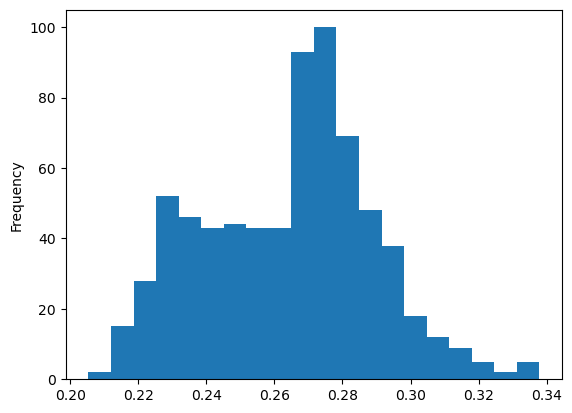

In [9]:
df.ALK_ALT_CO2_rmse.plot.hist(bins=20)

<Axes: ylabel='Frequency'>

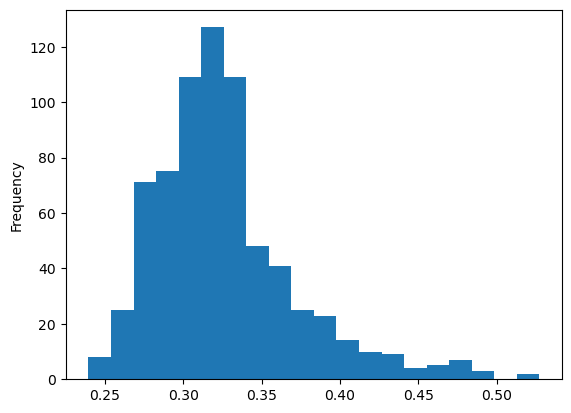

In [10]:
df.DIC_ALT_CO2_rmse.plot.hist(bins=20)

<Axes: ylabel='Frequency'>

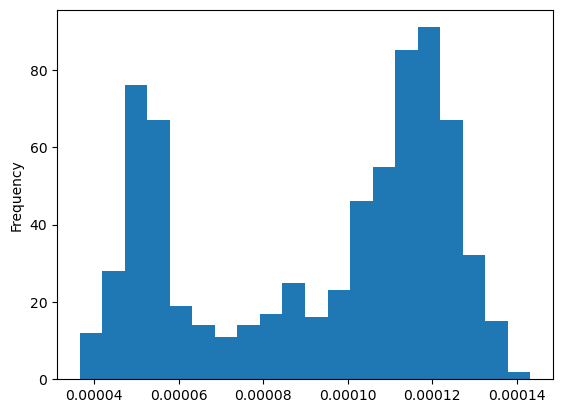

In [11]:
df.FG_ALT_CO2_rmse.plot.hist(bins=20)

## Analysis

In [12]:
calc.analyze(clobber=False, n=1430)

  0%|          | 0/714 [00:00<?, ?it/s]

In [13]:
calc.df_analysis

,zarr_path
case,
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-01-01_00000.001,/global/cfs/projectdirs/m4746/Projects/Ocean-C...
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-04-01_00001.001,/global/cfs/projectdirs/m4746/Projects/Ocean-C...
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-07-01_00002.001,/global/cfs/projectdirs/m4746/Projects/Ocean-C...
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-10-01_00003.001,/global/cfs/projectdirs/m4746/Projects/Ocean-C...
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_001_1999-01-01_00004.001,/global/cfs/projectdirs/m4746/Projects/Ocean-C...
...,...
smyle.cdr-atlas-v0.glb-dor_North_Pacific_basin_041_1999-07-01_00766.001,/global/cfs/projectdirs/m4746/Projects/Ocean-C...
smyle.cdr-atlas-v0.glb-dor_North_Pacific_basin_041_1999-10-01_00767.001,/global/cfs/projectdirs/m4746/Projects/Ocean-C...
smyle.cdr-atlas-v0.glb-dor_North_Pacific_basin_042_1999-01-01_00768.001,/global/cfs/projectdirs/m4746/Projects/Ocean-C...


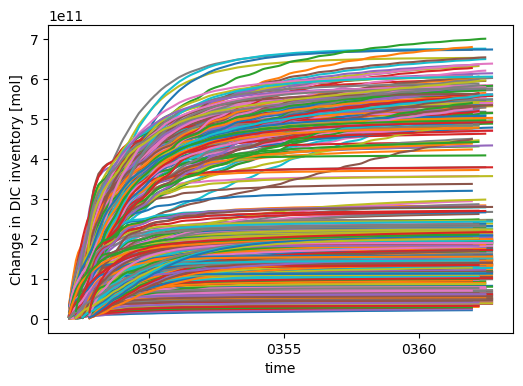

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

for row_data in calc.df_analysis.iterrows():
    case = row_data[0]
    path_zarr = row_data[1].iloc[0]   
    da = xr.open_zarr(path_zarr)["DIC_ADD_TOTAL"]
    da.plot(ax=ax, label=case)

## Visualization

In [ ]:
#calc.visualize(clobber=True)